# Template Notebook
This is a template Notebook whose goal is to 
- give you some basic notions on python & pandas dataframe that could be useful for this project.
- use custom functions to load
    - the csv files containing the features for the different trips.
    - the label.csv file that contains the trips label (True if there is a fall, False if not)

You are free to use other Python libraries / modules than pandas & matplotlib.pyplot if you prefer. Likewise, you are not forced to work on a Jupyter Notebook & use scripts instead.

# Importing
## From external libraries/modules

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## From custom/internal files

In [3]:
from config import get_label_dataframe, get_trip_dataframe

文件可读
文件可写
文件可执行


# Basic pandas dataframe manipulation
Load the index csv file using the custom function get_label_dataframe defined in the config.py file and imported in the previous section.

In [4]:
labels = get_label_dataframe()
labels # Note that if the last line of a Notebook cell is a variable, then it is printed.

trip_id  label
0    ceg2vj6tu709fko0l7j0  False
1    ceg6nlin1mf0nq0rsvfg  False
2    ceg720in1mf0nq0s1020  False
3    ceg9ttv23k7u8q8iv4g0  False
4    cegb39n23k7u8q8jf9j0  False
..                    ...    ...
287  cgnk8tvo61i2hp2g90b0  False
288  cgobg6vo61i2hp2mu2t0  False
289  cgqi5vfo61i2hp37j06g  False
290  cgrabe7be75spfm9rktg   True
291  cgrvv1akvau8srf3s810   True

[292 rows x 2 columns]

In [5]:
# Pandas masks
labels_fall = labels[labels.label == True] # Here we keep only the rows where label is equal to True
labels_fall

trip_id  label
7    cegqnhn23k7u8q8mrvd0   True
17   cehg62f23k7rp9sbbnq0   True
23   cehlilmtu704g62kqdj0   True
29   cei5nr42hm20a1u4bebg   True
38   ceimfo42hm20a1u9l400   True
51   ceivoqc2hm20a1udrh8g   True
60   cejnh7k2hm20a1ujo3r0   True
61   cejocus2hm20a1ujsshg   True
77   cekoss723k7til7oeoc0   True
131  cen12tn23k7hf6j20rp0   True
146  cenh8cf23k7hf6j8gl10   True
147  cenhkh723k7g9vg4ap00   True
157  cennu9v23k7g9vg6sqk0   True
177  ceo6e6n23k7g9vgda9f0   True
188  ceoeb9n23k7g9vggkt40   True
191  ceog4bf23k7g9vghb2r0   True
202  ceook5f23k7g9vgk5pmg   True
218  ceu6dqha7hhr9jkddda0   True
219  cf08q3ps1qo65q8ut2d0   True
232  cgcpcfuf7jtbk30lcq00   True
241  cgg36cmf7jtbk31gp1f0   True
263  cgjdt63m541g3u9bal7g   True
265  cgjq64rm541g3u9ep4o0   True
282  cgmn63vo61i6ggoeb91g   True
290  cgrabe7be75spfm9rktg   True
291  cgrvv1akvau8srf3s810   True

Note that we could have used
- labels_fall = labels[labels.label]
- labels_fall = labels[labels["label"]] => labels["label"] is equivalent to labels.label
- labels_fall = labels.query('label == True') => this one is more advanced
In general there are many functions/methods in pandas to choose from. To learn about them & be more efficient, check resources online.

# Online resources

## Pandas documentation
To know more about the pandas library & the built-in methods, check the documentation https://pandas.pydata.org/docs/reference/index.html.

The documentation is very large. Do not hesitate to use google to find the right documentation page:
- the first google result to "pandas query" is the documentation page https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html, where you have examples that help understand better how to use the methods & functions

## Stackoverflow
Another good sources of info is the forum stackoverflow, where people ask questions & get answers from their peer.
Likewise, the naive google search "pandas get all rows where column is equal to a value stackoverflow" first result is https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values where the provided answers are very insightful.

Do not hesitate to ask google what you want to do with your dataframe, and you will most likely find your anwser there.

## ChatGPT
Another source of info is ChatGPT.

In [6]:
first_fall_dataframe = labels_fall.iloc[0] # here we take the first row of the dataframe labels_fall (note: it becomes a pandas series)
first_fall_trip_id = first_fall_dataframe["trip_id"]
print(f"The first fall trip id is {first_fall_trip_id}") # Use f-strings to print (use {} to print variables)

# Store the trip id of all the trips with a fall in a list
list_fall_trip_id = list(labels_fall.trip_id)

The first fall trip id is cegqnhn23k7u8q8mrvd0


In [7]:
# Get the trip id of the falls as a list of strings & 
trip_dataframe = get_trip_dataframe(first_fall_trip_id)
# Here we use the custom function get_trip_dataframe() defined in the config.py file to load the .csv corresponding to the trip id
# Note that you can define functions in the config.py file & use them here if you import them (see first cell of this Notebook where we explicitly import get_trip_dataframe).
# Do not forget to rerun the import cell when importing new functions!
trip_dataframe

timestamp  AX_mean  AX_min  AX_max  AX_median  AX_std  AX_meandiff  \
0            0   0.4274  0.4235  0.4357     0.4267  0.0029      -0.0083   
1            1   0.4191  0.3134  0.4416     0.4291  0.0317      -0.0405   
2            2   0.3786 -0.4777  1.5518     0.4624  0.4883       0.0631   
3            3   0.4416 -0.2156  1.1839     0.5064  0.3100       0.0035   
4            4   0.4451  0.3879  0.5164     0.4442  0.0337       0.0038   
..         ...      ...     ...     ...        ...     ...          ...   
419        449   0.5102  0.4852  0.5284     0.5094  0.0137       0.0013   
420        450   0.5115  0.5002  0.5227     0.5119  0.0086       0.0043   
421        451   0.5157  0.4713  0.5554     0.5138  0.0291      -0.0013   
422        453   0.5132  0.4804  0.5543     0.5125  0.0163       0.0000   
423        454   0.5132  0.4867  0.5382     0.5170  0.0120          NaN   

     AX_mediandiff  AX_extremum  AX_delta  ...  Anorm_delta  Gnorm_mean  \
0           0.0024       0.4357    0.0122  ...       0.0091      0.9192   
1           0.0333       0.4416    0.1282  ...       0.0720      0.9223   
2           0.0440       1.5518    2.0296  ...       0.7265     11.8454   
3          -0.0622       1.1839    1.3995  ...       0.3842      6.8365   
4           0.0052       0.5164    0.1285  ...       0.1019      4.5521   
..             ...          ...       ...  ...          ...         ...   
419         0.0025       0.5284    0.0432  ...       0.0310      0.9072   
420         0.0020       0.5227    0.0225  ...       0.0083      0.9422   
421        -0.0006       0.5554    0.0842  ...       0.0132      0.9369   
422         0.0045       0.5543    0.0739  ...       0.0382      0.9276   
423            NaN       0.5382    0.0515  ...       0.0563      0.9171   

     Gnorm_min  Gnorm_max  Gnorm_median  Gnorm_std  Gnorm_meandiff  \
0       0.9023     0.9397        0.9192     0.0097          0.0031   
1       0.7631     0.9722        0.9238     0.0370         10.9231   
2       0.7835    46.7059        3.7220    14.6333         -5.0088   
3       2.7873     9.7588        7.0483     2.2283         -2.2845   
4       2.8400     8.2857        4.0580     1.3541         -3.0024   
..         ...        ...           ...        ...             ...   
419     0.7534     1.0650        0.8949     0.1108          0.0350   
420     0.8402     1.0506        0.9524     0.0755         -0.0053   
421     0.8290     1.0506        0.9381     0.0782         -0.0047   
422     0.6581     1.3197        0.8731     0.1893         -0.0106   
423     0.7313     1.2249        0.9231     0.1363             NaN   

     Gnorm_mediandiff  Gnorm_extremum  Gnorm_delta  
0              0.0046          0.9397       0.0374  
1              2.7982          0.9722       0.2092  
2              3.3263         46.7059      45.9225  
3             -2.9903          9.7588       6.9715  
4             -2.6404          8.2857       5.4458  
..                ...             ...          ...  
419            0.0575          1.0650       0.3116  
420           -0.0142          1.0506       0.2104  
421           -0.0325          1.0506       0.2216  
422            0.0499          1.3197       0.6615  
423               NaN          1.2249       0.4936  

[424 rows x 82 columns]

In [8]:
# Iterate on dataframe columns 
for column in list(trip_dataframe.columns[0:10]): # we iterate on the first 10 columns only
    print(f"The maximal value of the column {column} is {trip_dataframe[column].max()}") # the max method applied to a dataframe column returns the maximal value of said column.

The maximal value of the column timestamp is 454
The maximal value of the column AX_mean is 2.5713
The maximal value of the column AX_min is 1.2242
The maximal value of the column AX_max is 10.7014
The maximal value of the column AX_median is 2.925
The maximal value of the column AX_std is 6.0265
The maximal value of the column AX_meandiff is 1.7034
The maximal value of the column AX_mediandiff is 2.2713
The maximal value of the column AX_extremum is 10.7014
The maximal value of the column AX_delta is 19.8104


In [9]:
# Already existing methods to get a brief description of a dataframe columns 
trip_dataframe.iloc[:,0:10].describe() # We call the function on the first 10 columns for readability.

timestamp     AX_mean      AX_min      AX_max   AX_median      AX_std  \
count  424.000000  424.000000  424.000000  424.000000  424.000000  424.000000   
mean   222.929245    0.483940   -0.449893    1.436137    0.481163    0.557682   
std    130.564675    0.342496    1.514305    1.426611    0.374277    0.807857   
min      0.000000   -1.224500   -9.109000   -0.070300   -1.656300    0.000800   
25%    111.750000    0.441500   -1.179900    0.500600    0.454425    0.002675   
50%    220.500000    0.496000    0.488400    0.519750    0.496100    0.008850   
75%    333.250000    0.510200    0.492400    2.182450    0.511825    1.033725   
max    454.000000    2.571300    1.224200   10.701400    2.925000    6.026500   

       AX_meandiff  AX_mediandiff  AX_extremum    AX_delta  
count   423.000000     423.000000   424.000000  424.000000  
mean      0.000658       0.000057     1.523416    1.886032  
std       0.339181       0.383852     1.523113    2.791762  
min      -2.778200      -3.095300     0.157900    0.001900  
25%      -0.006700      -0.003200     0.500775    0.009000  
50%      -0.000200      -0.000100     0.523550    0.032000  
75%       0.002250       0.003200     2.306950    3.465350  
max       1.703400       2.271300    10.701400   19.810400

# Visualization
Visualize the features of a trip dataframe. First idea: plot the mean value of different signals.

Note that "mean" is not the only "feature function", the other "feature functions" available are min, max, median, std, meandiff, mediandiff, extremum, and delta. Refer to the documentation "More context on the dataset" or see the column names.
## Python synthax for plotting

Below, we use the "Python" way of ploting with the plot method of the DataFrame class. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

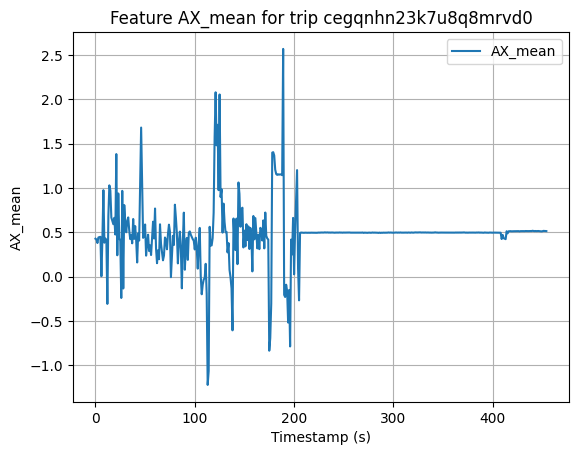

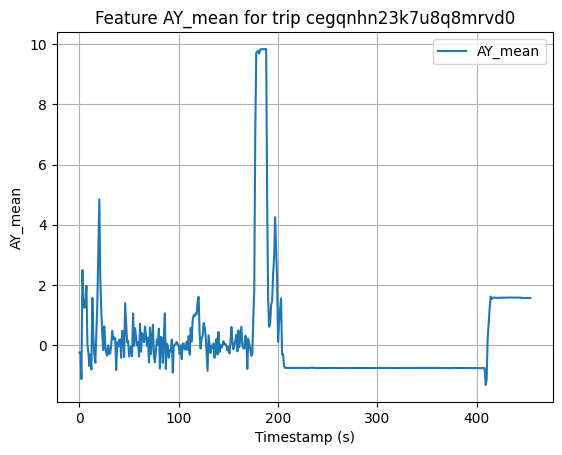

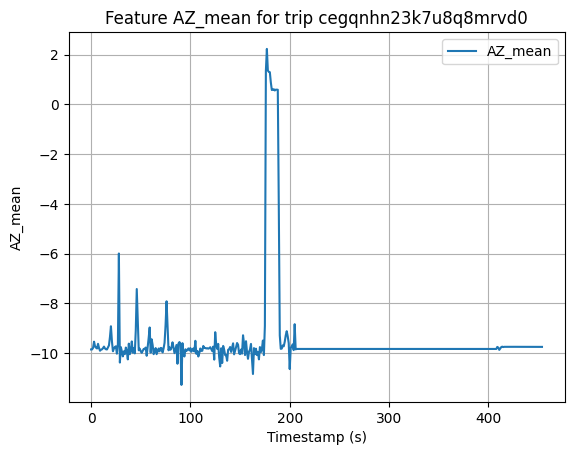

In [10]:
function = "mean" 
SIGNALS = ["AX", "AY", "AZ"] # Other available signals are GX, GY, GZ, Anorm, Gnorm, AYGX, refer to the documentation.
features_of_interest = [signal + "_" + function for signal in SIGNALS]
for foi in features_of_interest:
    fig, ax = plt.subplots()
    trip_dataframe.plot(x = "timestamp", y = foi, ax = ax, grid = True)
    ax.set(xlabel = "Timestamp (s)", ylabel = foi, title = f"Feature {foi} for trip {first_fall_trip_id}")
    plt.show()

## Matlab synthax for plotting
Second visualization idea: check several features of the same signal (for instance the mean, min and max values).

Here we use the "Matlab" synthax that might be more familiar for you.

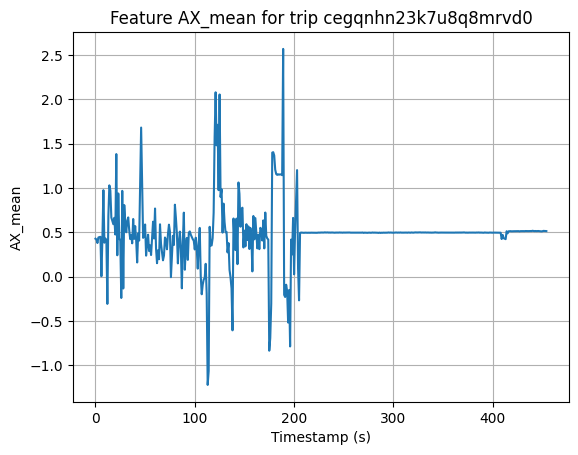

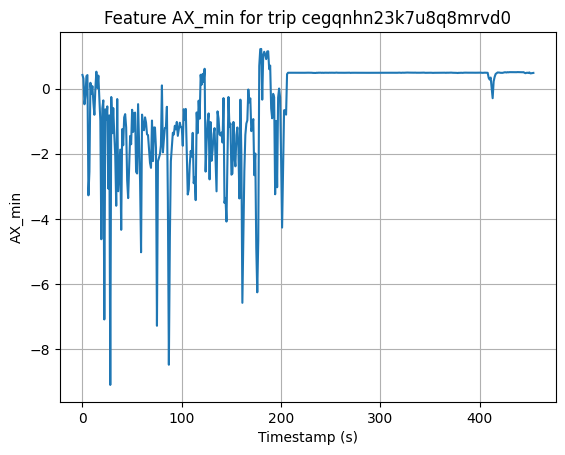

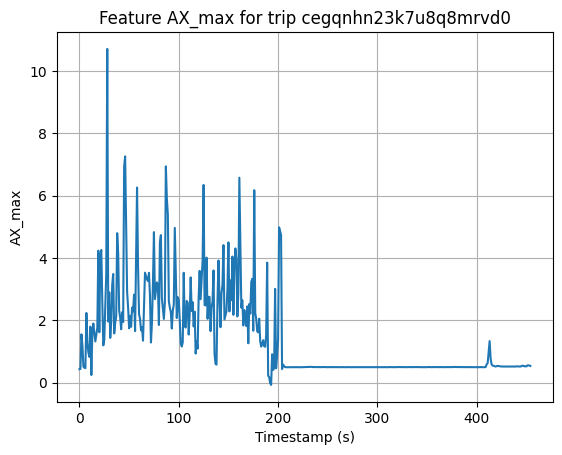

In [11]:
FUNCTIONS = ["mean", "min", "max"]
signal = "AX" # Signals are AX, AY, AZ, GX, GY, GZ, Anorm, Gnorm, and AYGX.
features_of_interest = [signal + "_" + function for function in FUNCTIONS]
for foi in features_of_interest:
    plt.figure()
    plt.plot(trip_dataframe.timestamp, trip_dataframe[foi])
    plt.grid()
    plt.title(f"Feature {foi} for trip {first_fall_trip_id}")
    plt.xlabel("Timestamp (s)")
    plt.ylabel(foi)
    plt.show()
# Here we use a more "Matlab" synthax, where we provide the x and y data arrays to the plt.plot() function.

## Ploting two features on the same graph

Third idea: check simultaneously two features for a list of trips (superposition).

In [12]:
# Define the features of interest
function_1 = "mean"
function_2 = "std"
signal_1 = "GZ"
signal_2 = "GX"
feature_1 = signal_1 + "_" + function_1
feature_2 = signal_2 + "_" + function_2

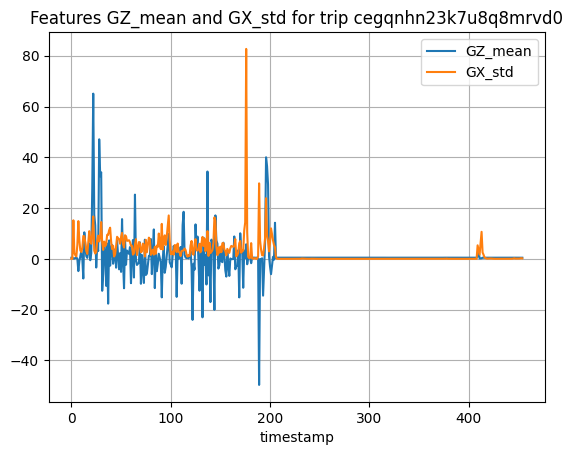

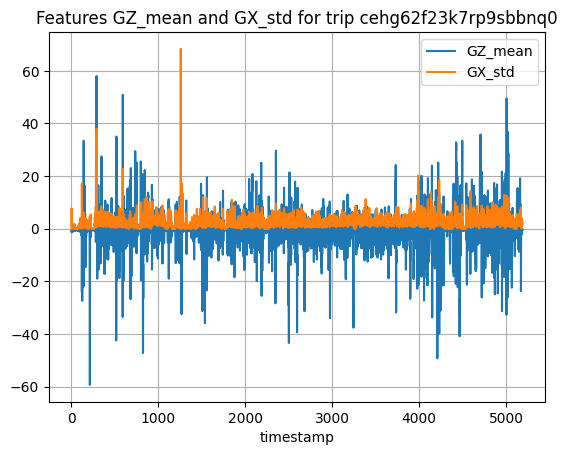

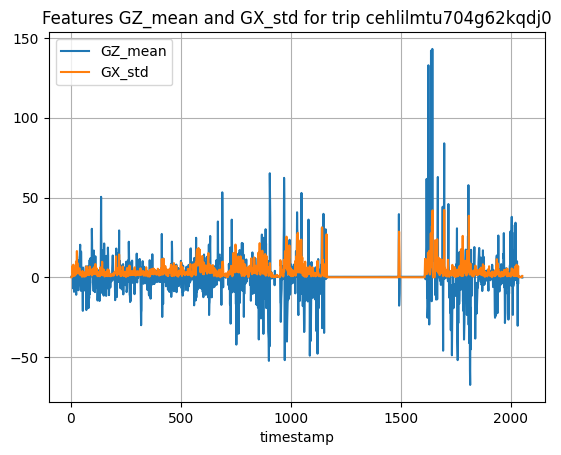

In [13]:
for trip_id in list_fall_trip_id[0:3]: # Here the first 3 fall trips
    df = get_trip_dataframe(trip_id)
    fig, ax = plt.subplots()
    df.plot(x = "timestamp", y = [feature_1, feature_2], ax = ax, grid = True)
    ax.set(title = f"Features {feature_1} and {feature_2} for trip {trip_id}")
    plt.show()

## Subplots

Likewise, but we plot the two features on different subplots.

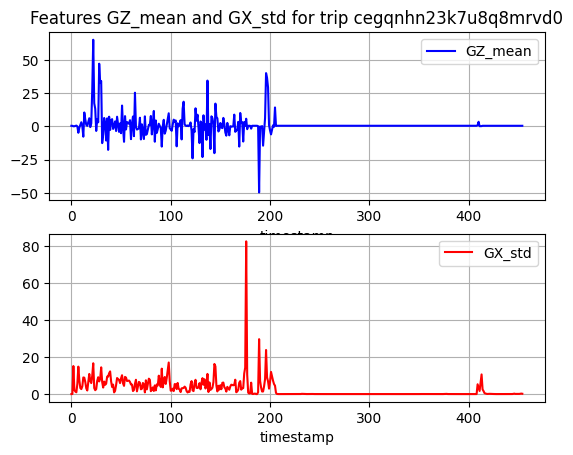

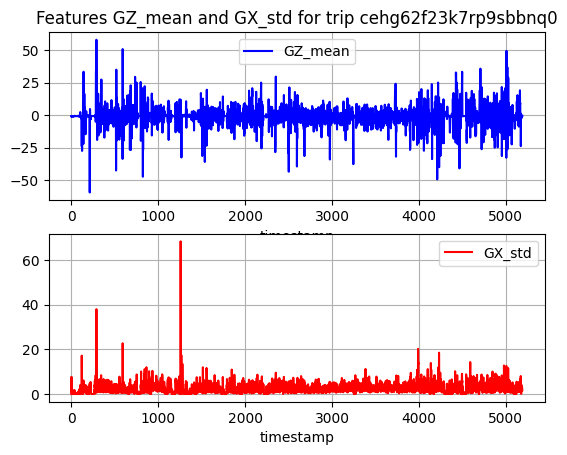

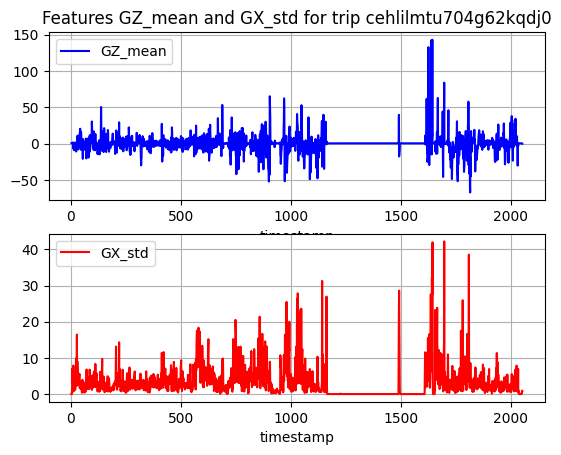

In [14]:
for trip_id in list_fall_trip_id[0:3]:
    df = get_trip_dataframe(trip_id)
    fig, ax = plt.subplots(2)
    df.plot(x = "timestamp", y = feature_1, ax = ax[0], grid = True, color = 'b') # ax[0] refers to the first subplot axis
    df.plot(x = "timestamp", y = feature_2, ax = ax[1], grid = True, color = 'r') # ax[1] refers to the second subplot axis
    ax[0].set(title = f"Features {feature_1} and {feature_2} for trip {trip_id}")
    plt.show()

# Factorization
In the above section on visualization, we repeat different variations of the same lines of code. This is a bad practice as it increases human errors. To prevent this, please use functions.

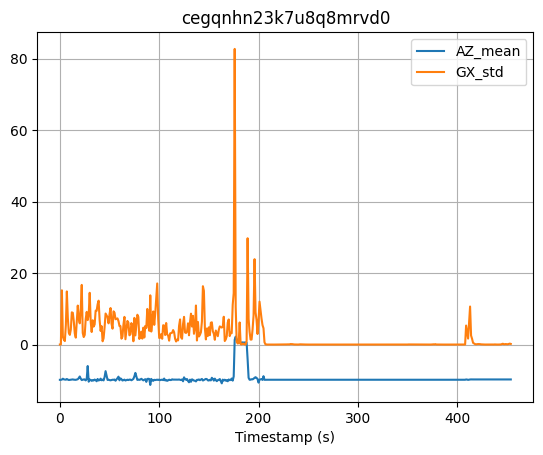

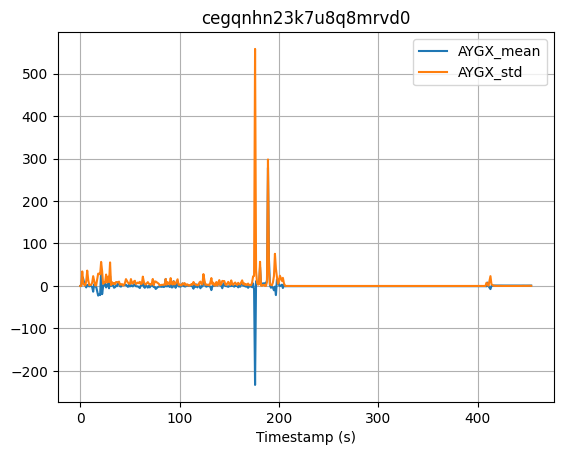

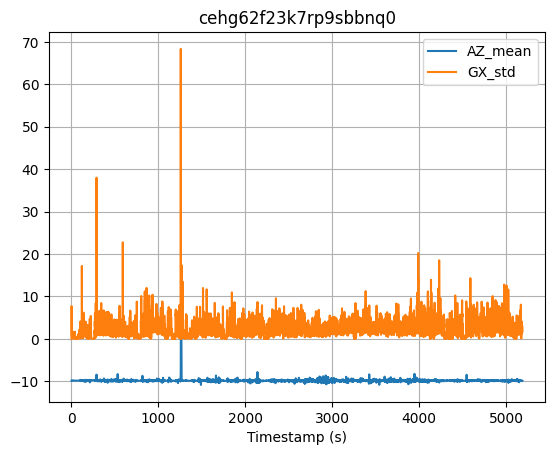

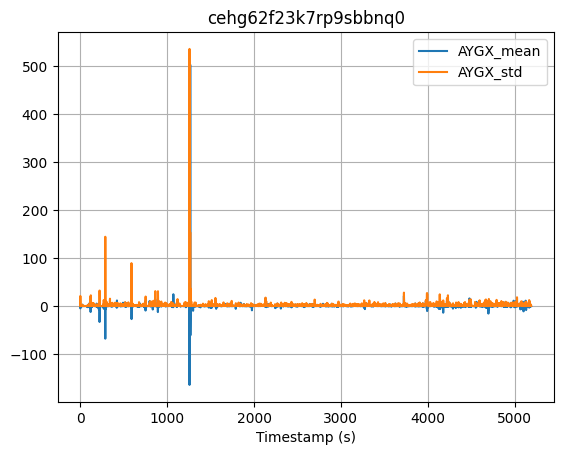

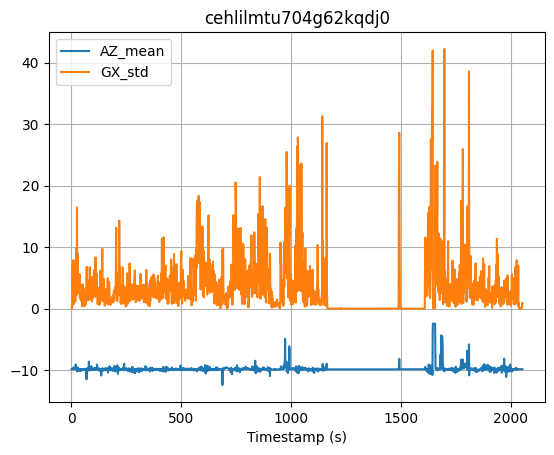

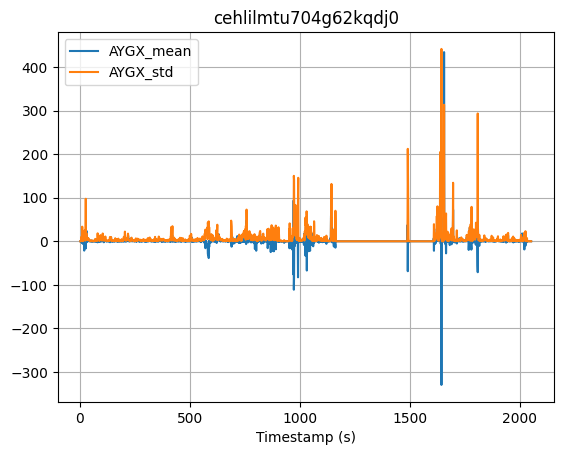

In [15]:
def visualize_trip_feature(trip_id, list_feature_name, subplots):
    dataframe = get_trip_dataframe(trip_id)
    dataframe.plot(x = "timestamp", y = list_feature_name, grid = True, subplots = subplots, sharex = True, title = trip_id, xlabel = "Timestamp (s)")
    plt.show()
    
for trip_id in list_fall_trip_id[0:3]:
    visualize_trip_feature(trip_id, ["AZ_mean", "GX_std"], subplots = False)
    visualize_trip_feature(trip_id, ['AYGX_mean','AYGX_std'], subplots = False)